#### Loading Data Set

In [29]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [30]:
df = pd.read_csv('sudoku_uk.csv').drop('Unnamed: 0', axis=1)

df = df.replace({'Gentle': 'Gentle-1', 'Moderate': 'Moderate-2', 'Tough': 'Tough-3','Diabolical': 'Diabolical-4'})

In [31]:
# check size
df.shape

(5017, 8)

In [32]:
df.head()

,URL,Level,People,Average-Time,Unit-Time,Sudoku,Solution,Id
0,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Moderate-2,292,14,minutes,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,0
1,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Gentle-1,283,12,minutes,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,1
2,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Diabolical-4,238,30,minutes,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,2
3,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Moderate-2,274,14,minutes,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,3
4,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Diabolical-4,244,28,minutes,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,4


In [33]:
# Reorganizing the columns
list(df.columns)

['URL',
 'Level',
 'People',
 'Average-Time',
 'Unit-Time',
 'Sudoku',
 'Solution',
 'Id']

In [34]:
df = df[['Id', 'Level', 'Sudoku','Solution', 'People', 'Average-Time','Unit-Time','URL']]

In [35]:
df.head()

,Id,Level,Sudoku,Solution,People,Average-Time,Unit-Time,URL
0,0,Moderate-2,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,292,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
1,1,Gentle-1,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,283,12,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
2,2,Diabolical-4,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,238,30,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
3,3,Moderate-2,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,274,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
4,4,Diabolical-4,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,244,28,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...


### Who many levels are there?

In [36]:
df['Level'].value_counts()

Moderate-2      2151
Diabolical-4    1432
Tough-3          717
Gentle-1         717
Name: Level, dtype: int64

##### On the website they rank the levels in this way from the easiest to the most difficult:
##### 1. Gentle 
##### 2. Moderate 
##### 3. Tough 
##### 4. Diabolical


### QUESTION / HYPTHESIS /RESULTS

#### 1) Is the number of people who solve easy Sudoku greater than those who solve difficult?
#### Hypothesis: the total of players fro the level "Gentle" is bigger than the leven "Diabolical" 
#### Results:

In [37]:
df['People'].groupby([df['Level']]).sum()

Level
Diabolical-4     954833
Gentle-1         594821
Moderate-2      1697595
Tough-3          534043
Name: People, dtype: int64

In [38]:
df.groupby('Level')[['People']].sum()

,People
Level,
Diabolical-4,954833
Gentle-1,594821
Moderate-2,1697595
Tough-3,534043


In [39]:
gb1 = df.groupby('Level', as_index=False).agg({"People": "sum"}).sort_values(by='People', ascending=False)
total= gb1.People.sum()
gb1['%'] = gb1['People']/total
gb1.head()

,Level,People,%
2,Moderate-2,1697595,0.448946
0,Diabolical-4,954833,0.252515
1,Gentle-1,594821,0.157306
3,Tough-3,534043,0.141233


In [40]:
diabolical = gb1[gb1['Level']=='Diabolical-4'].values[0,1]
gentle = gb1[gb1['Level']=='Gentle-1'].values[0,1]


In [41]:
if gentle > diabolical:
    print('Hyphothesis is True')
else: 
    print('The hypothesis is False , more people plays diabolical than Gentle')

The hypothesis is False , more people plays diabolical than Gentle


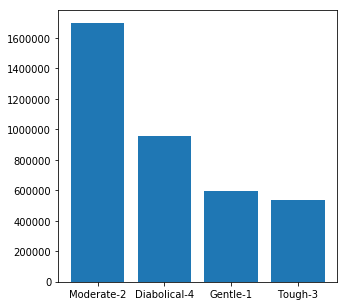

In [42]:
### Plot 
plt.figure(figsize=(5, 5))
plt.bar(gb1['Level'], gb1['People'])
plt.show();

#### 2) Does it take more time for people to solve the most difficult  ?
#### Hypothesis: The average time to solve Sudoku in a "Diabolical" level is bigger than "Thought" level
#### Results:

In [43]:
gb2 = df.groupby('Level', as_index=False).agg({"Average-Time": "mean"}).sort_values(by='Average-Time', ascending=False)
gb2.head()

,Level,Average-Time
0,Diabolical-4,31.043994
3,Tough-3,24.037657
2,Moderate-2,17.211994
1,Gentle-1,13.919107


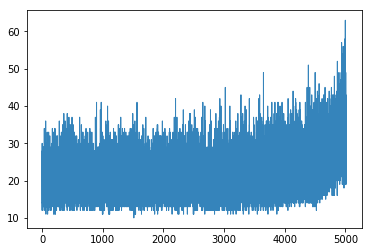

In [44]:
plt.plot(df['Id'], df['Average-Time'], marker='', linewidth=1, alpha=0.9, label=df['Level'])

#### 3) Is the difficulty of a level defined by the amound of numbers given in the initial Sudoku?
#### Hypothesis: Each Level has a range of numbers given in the initial Sudoku
#### Results:

In [45]:
# df['number_given'] = df.apply(lambda row: row.Sudoku.isdigit(), axis = 1)
# df.head()

In [46]:
len(df)

5017

In [47]:
df['number_given']= 0
for i in range(len(df)):
    df['number_given'][i] = sum(c.isdigit() for c in df['Sudoku'][i])

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
sum(c.isdigit() for c in df['Sudoku'][0])

25

In [49]:
df['number_given'][0]

25

In [50]:
df.head()

,Id,Level,Sudoku,Solution,People,Average-Time,Unit-Time,URL,number_given
0,0,Moderate-2,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,292,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25
1,1,Gentle-1,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,283,12,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,28
2,2,Diabolical-4,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,238,30,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,27
3,3,Moderate-2,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,274,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25
4,4,Diabolical-4,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,244,28,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25


In [51]:
number_gentle = df['number_given'][df['Level']=='Gentle-1'].unique()
number_moderate = df['number_given'][df['Level']=='Moderate-2'].unique()
number_tough = df['number_given'][df['Level']=='Tough-3'].unique()
number_diabolical = df['number_given'][df['Level']=='Diabolical-4'].unique()

In [59]:
number_gentle.sort()
number_gentle

array([23, 24, 25, 26, 27, 28, 29])

In [60]:
number_moderate.sort()
number_moderate

array([22, 23, 24, 25, 26, 27, 28, 29])

In [61]:
number_tough.sort()
number_tough

array([22, 23, 24, 25, 26, 27, 28, 29])

In [62]:
number_diabolical.sort()
number_diabolical

array([21, 22, 23, 24, 25, 26, 27, 28, 29])

#### PREDICT if base on the position I can predict the level

In [63]:
test = df['Sudoku']
test.head()

0    .96..3.4.8.....1..4....6.829....4.....4.5.3......
1    ..7..34....17528......8.....4.5...3.1.2...5.8....
2    .6...3.7.....6.1.49.......3..97.45..7...1...9....
3    .54....8.....4..7.79...8.....26..1....35..2......
4    ..2...9......425.....751...4.......63.7...8..8...
Name: Sudoku, dtype: object

In [64]:
len(test)

5017

In [65]:
def split(element): 
    return [char for char in element]


In [66]:
for i in range(len(test)):
#     test['Sudoku'][i] = split(test['Sudoku'][i])
    test[i] = [x.replace('.','0') for x in test[i]]


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [67]:
test.head()

0    [0, 9, 6, 0, 0, 3, 0, 4, 0, 8, 0, 0, 0, 0, 0, ...
1    [0, 0, 7, 0, 0, 3, 4, 0, 0, 0, 0, 1, 7, 5, 2, ...
2    [0, 6, 0, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0, 6, 0, ...
3    [0, 5, 4, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 4, 0, ...
4    [0, 0, 2, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 4, 2, ...
Name: Sudoku, dtype: object

### PREDICT LEVEL

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
y = df['Level']
x = test

In [70]:
x.head()

0    [0, 9, 6, 0, 0, 3, 0, 4, 0, 8, 0, 0, 0, 0, 0, ...
1    [0, 0, 7, 0, 0, 3, 4, 0, 0, 0, 0, 1, 7, 5, 2, ...
2    [0, 6, 0, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0, 6, 0, ...
3    [0, 5, 4, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 4, 0, ...
4    [0, 0, 2, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 4, 2, ...
Name: Sudoku, dtype: object

In [71]:
y = y.replace({'Gentle-1': '1', 'Moderate-2': '2', 'Tough-3': '3','Diabolical-4': '4'})


In [72]:
y.head()

0    2
1    1
2    4
3    2
4    4
Name: Level, dtype: object

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4013,), (4013,), (1004,), (1004,))

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=25,max_depth=10)

In [75]:
rf.fit(list(X_train),y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
y_pred =rf.predict(list(X_test))

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4123505976095618

#### CNN

In [78]:
def transform_matrix(element):
  return np.reshape(element, (-1, 9))

In [79]:
X_train.shape

(4013,)

In [80]:
X_train_new = []

for i in X_train:
#     print('here:   ',i)
    X_train_new.append(transform_matrix(i).astype(np.float))


In [81]:
len(X_train_new)

4013

In [82]:
X_train_new[0].shape

(9, 9)

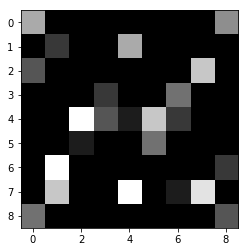

In [83]:
plt.gray()
plt.imshow(X_train_new[1])
plt.show()

In [84]:
y_train.shape

(4013,)

In [85]:
# Create a model 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


ModuleNotFoundError: No module named 'keras'

In [86]:
model = Sequential()
# Input => Hidden
model.add(Dense(9, input_dim=9, activation='relu'))
# Hiddens
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(3, activation='relu'))
# Output
model.add(Dense(1, activation='relu'))


model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model.fit(X_train_new,y_train, epochs=150)

AssertionError: 